#### Before running the code
#### - Upload the notation fonts `/fonts/OpusStd.ttf` and `/fonts/OpusSpecialStd.ttf` into `/content` folder
#### - Upload `/train_xyz.json` into `/content` folder


In [ ]:
# -*- coding: utf-8 -*-

# dependencies
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy import interpolate
import csv
import pandas as pd
import json
import math



In [ ]:
font_dirs = ["/content"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

#TODO: fix the font issue
fontprop2 = fm.FontProperties(fname=font_files[1], size=20)
fontprop1 = fm.FontProperties(fname=font_files[0], size=20)



#### After the initial run, run after here (`Cmd/Ctrl+F10`) after each new slider setting (no need to re-run the slider cell). This will add new data into `slider_values.json`

In [ ]:
slider_values_list = []
# Write the updated data to the file
with open("slider_values.json", "w") as file:
    json.dump(slider_values_list, file, indent=4)


In [ ]:
# Initialize the list to store the slider values
# slider_values_list = []
for thisseed in range(1000, 1001): #32
    amount = 2
    seed = thisseed
    random.seed(seed)

    # Function to update the slider values
    #"{:.2f}".format to avoid scientific notation in the arrays

    def update_slider_values(change):
        slider_values = {
            "speed": "{:.2f}".format(random.uniform(0.2, 2.0)),
            "size": random.randint(3, 12),
            "x_offset": "{:.2f}".format(random.uniform(0.4, 3.0)),
            "y_offset": "{:.2f}".format(random.uniform(0.0, 0.0)),
            "rhythm_deviation": "{:.2f}".format(random.uniform(0.0, 0.3)),
            "pitch_deviation": "{:.2f}".format(random.uniform(0.0, 0.15)),
            "accidental_deviation": random.randint(10, 20),
            "amp_1_slider": "{:.2f}".format(random.uniform(0.0, 1.0)),
            "amp_2_slider": "{:.2f}".format(random.uniform(0.0, 1.0)),
            "amp_3_slider": "{:.2f}".format(random.uniform(0.0, 1.0)),
            "amp_mean1_slider": "{:.2f}".format(random.uniform(0.0, 0.33)),
            "amp_mean2_slider": "{:.2f}".format(random.uniform(0.34, 0.66)),
            "amp_mean3_slider": "{:.2f}".format(random.uniform(0.67, 1.0)),
            "amp_kurt1_but": random.choice([0, 1, 2]),
            "amp_kurt2_but": random.choice([0, 1, 2]),
            "amp_kurt3_but": random.choice([0, 1, 2]),
            "tamp_1_slider": "{:.2f}".format(random.uniform(0.0, 1.0)),
            "tamp_2_slider": "{:.2f}".format(random.uniform(0.0, 1.0)),
            "tamp_3_slider": "{:.2f}".format(random.uniform(0.0, 1.0)),
            "tamp_mean1_slider": "{:.2f}".format(random.uniform(0.0, 0.33)),
            "tamp_mean2_slider": "{:.2f}".format(random.uniform(0.34, 0.66)),
            "tamp_mean3_slider": "{:.2f}".format(random.uniform(0.67, 1.0)),
            "tamp_kurt1_but": random.choice([0, 1, 2]),
            "tamp_kurt2_but": random.choice([0, 1, 2]),
            "tamp_kurt3_but": random.choice([0, 1, 2])
        }

        slider_values_list.append(slider_values)

    # Update the slider values
    for i in range(amount):
        update_slider_values(None)

# Write the updated data to the file
with open("slider_values.json", "w") as file:
    json.dump(slider_values_list, file, indent=4)


In [ ]:
# slider_values_list

with open("slider_values.json", "r") as file:
    slider_values = json.load(file)
output_features = np.array([list(item.values()) for item in slider_values])
len(output_features)

2

In [ ]:
original_array = output_features

# Convert strings to numeric values
def convert_to_number(s):
    try:
        return float(s) if '.' in s else int(s)
    except ValueError:
        return s

# Convert to list of lists with numeric
output_features = [[convert_to_number(item) for item in inner] for inner in original_array]

print(output_features)
len(output_features)

slider_values_list = output_features

# Write the updated data to the file
with open("slider_values.json", "w") as file:
    json.dump(slider_values_list, file, indent=4)


[[1.6, 4, 1.42, 0.0, 0.05, 0.15, 16, 0.13, 0.67, 0.36, 0.16, 0.4, 0.89, 0, 1, 0, 0.04, 0.97, 0.49, 0.15, 0.57, 0.81, 0, 0, 2], [1.04, 6, 2.96, 0.0, 0.21, 0.02, 12, 0.29, 0.0, 0.81, 0.21, 0.42, 0.84, 2, 0, 0, 0.91, 0.38, 0.99, 0.08, 0.45, 0.83, 0, 1, 1]]


In [ ]:
# recursive func for forcing boundaries
def adjust_xbound(x_off, speed):
    if (x_data[0]*speed) + x_off < 0.4:
        x_off += 0.1
        speed *= 0.8
        return adjust_xbound(x_off, speed)
    elif (x_data[-1]*speed) + x_off > 10.0:
        x_off -= 0.1
        speed *= 0.8
        return adjust_xbound(x_off, speed)
    else:
        return [x_off, speed]

#  func for 0.5 resolution
def resol_half(n):
    return round(n * 2) / 2


## REST OF THE INSTRUMENTS:

y_std_dev:  4
y_data after:  [5.5, 8.0, 6.0, 4.5]
beat_start < 3 and beat_end <= 8
x_off 1.42
x_data:  [-0.06435666428198443, 1.6256745237671888, 3.1979613695622344, 4.851545906274145]
angles:  [9.5, -7.4, 10.7, -12.9]
inset_data_x:  [0.9556433357180156, 2.645674523767189, 4.217961369562234, 5.871545906274145]
inset_data_y:  [0.33 0.33 0.33 0.33]
cent_dev: [18.095283333333334, -14.095273333333335, 20.381003333333332]


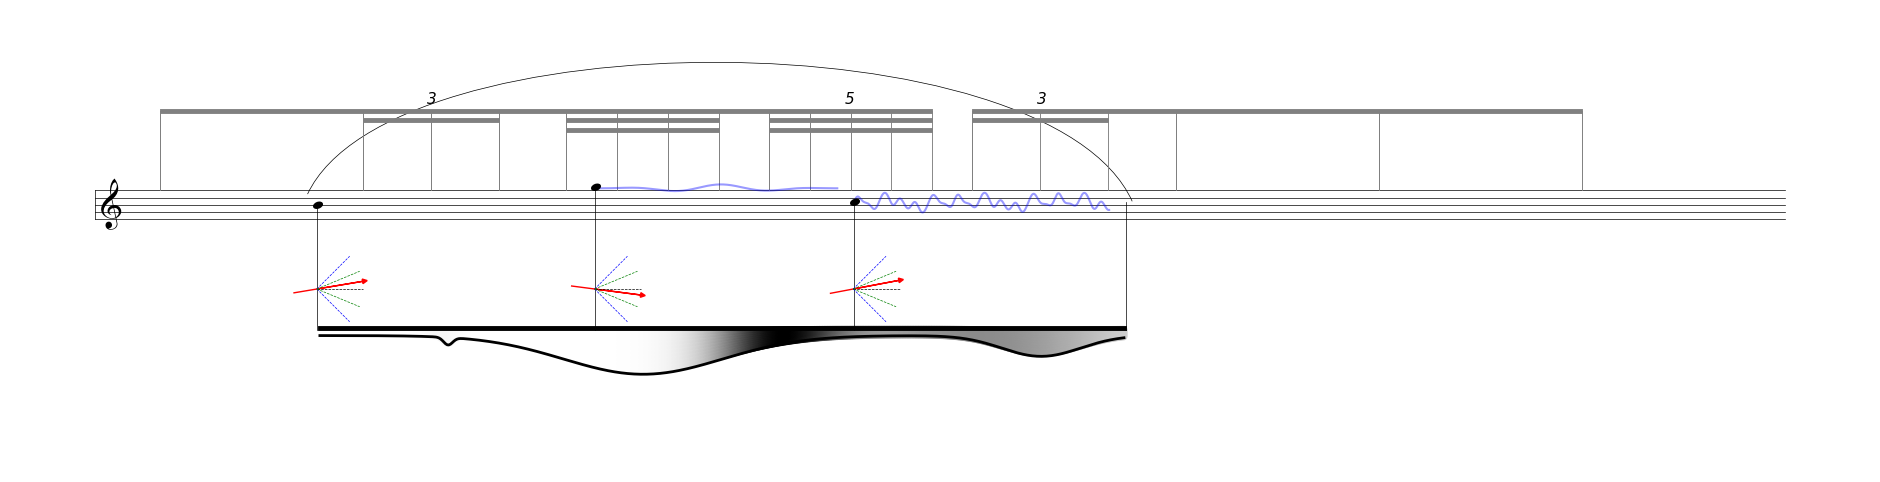

y_std_dev:  1
y_data after:  [6.0, 5.0, 5.5, 6.5, 8.5, 5.5]
beat_start < 3 and beat_end <= 8
x_off 2.96
x_data:  [-0.019630334599896472, 1.00729620637137, 2.168568581545085, 2.955909251189138, 4.363399956985203, 5.145956870218757]
angles:  [13.3, -13.9, 1.2, -17.6, -21.0, 23.6]
inset_data_x:  [2.5403696654001036, 3.56729620637137, 4.728568581545085, 5.515909251189138, 6.923399956985204, 7.705956870218756]
inset_data_y:  [0.33 0.33 0.33 0.33 0.33 0.33]
cent_dev: [25.33339666666667, -26.476256666666668, 2.2857199999999995, -33.52389333333333, -40.0001]


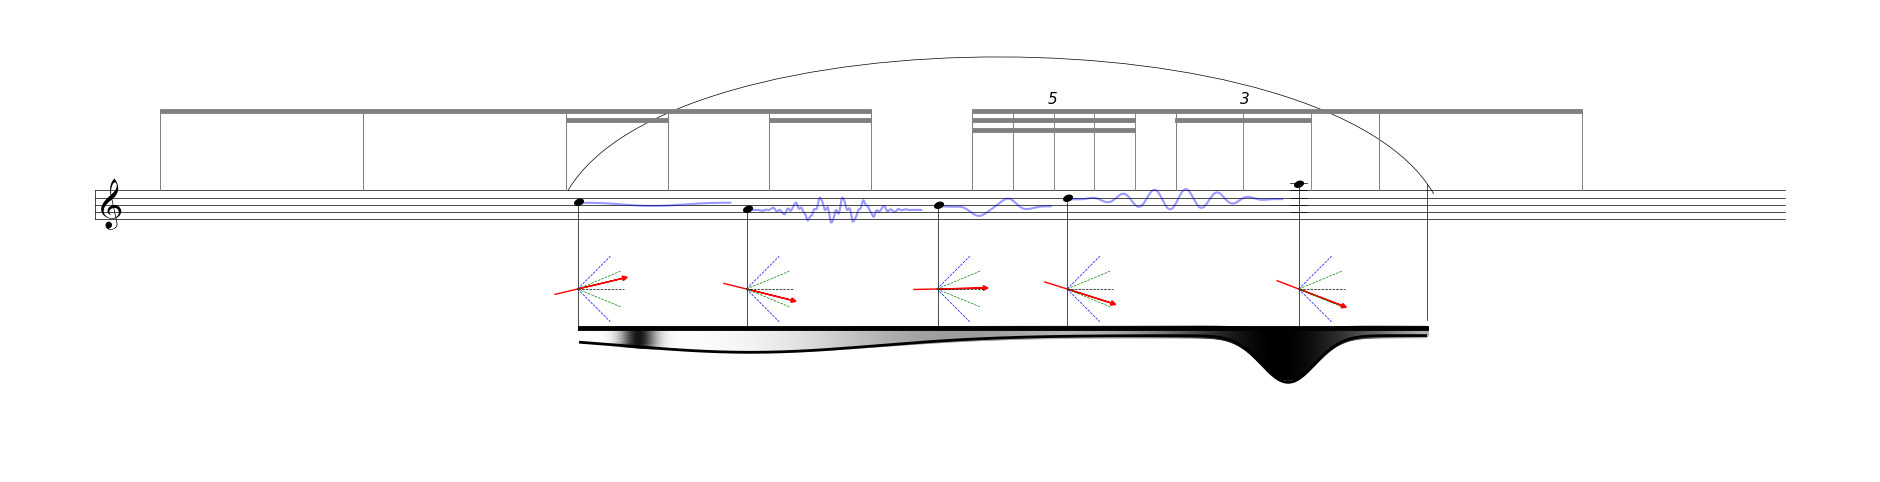

In [ ]:
np.random.seed(seed)

import warnings
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc

for feature in range(len(output_features)):
  # create the figure and subplot:
  fig = plt.figure(figsize=(24, 6))

  ax = plt.subplot(1, 1, 1)

  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # constants & variables
  # seed_value = 1234
  # np.random.seed(seed_value)

  phan_off = 0.46
  base_y = -15.1

  # staff lines
  X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)
  # measure lines
  X_2, Y_2 = np.linspace(0.06, 0.06, 10), np.linspace(4, 0, 10)

  # notes:
  noteheads = ['f', ' ']
  # noteheads = ['O', ' ']



  notes = []

  for i in range(len(noteheads)):
    notes.append(noteheads[i])

  # sec_offset = [0, 0] #3.07 threshold
  sec_offset = np.zeros(len(output_features)) #3.07 threshold

  speed_slider = output_features[feature][0]
  size_slider = output_features[feature][1]
  x_offset_sl = output_features[feature][2]
  y_offset_sl = output_features[feature][3]
  rhythm_deviation = output_features[feature][4]
  pitch_deviation = output_features[feature][5]
  accidental_deviation = output_features[feature][6]
  amp_1_slider = output_features[feature][7]
  amp_2_slider = output_features[feature][8]
  amp_3_slider = output_features[feature][9]
  amp_mean1_slider = output_features[feature][10]
  amp_mean2_slider = output_features[feature][11]
  amp_mean3_slider = output_features[feature][12]
  amp_kurt1_but = output_features[feature][13]
  amp_kurt2_but = output_features[feature][14]
  amp_kurt3_but = output_features[feature][15]
  tamp_1_slider = output_features[feature][16]
  tamp_2_slider = output_features[feature][17]
  tamp_3_slider = output_features[feature][18]
  tamp_mean1_slider = output_features[feature][19]
  tamp_mean2_slider = output_features[feature][20]
  tamp_mean3_slider = output_features[feature][21]
  tamp_kurt1_but = output_features[feature][22]
  tamp_kurt2_but = output_features[feature][23]
  tamp_kurt3_but = output_features[feature][24]


  x_off = x_offset_sl
  y_off = 0.0
  pitch_off = y_offset_sl

  ## input etc. TODO: dataset input option
  speed = speed_slider
  size = int(size_slider)

  ## Speed / rhythmic irregularity / textural direction
  x_mean = 0
  x_std_dev = rhythm_deviation

  # Add randomness
  x_data = list(range(size))
  x_data = [x + np.random.normal(x_mean, x_std_dev) for x in x_data]
  # x_data:  [1.2627182972356865, 1.7928094727778388, 4.054497112863172, 6.9276885010283005, 7.0]

  x_off, speed = adjust_xbound(x_off, speed)

  x_data = [i*speed for i in x_data]

  # ensure the sequence is strictly increasing
  for i in range(1, len(x_data)):
      if x_data[i] <= x_data[i - 1]:
          x_data[i] = x_data[i - 1] + 0.001  # Adjust as needed

  y_data = list(range(size))
  # print("y_data: ", y_data)
  y_mean = np.mean([0,13])
  y_std_dev = pitch_deviation
  y_std_dev = round(y_std_dev * 26)
  y_std_dev = max(0, min(y_std_dev, 13))
  print("y_std_dev: ", y_std_dev)
  y_data = [resol_half(np.random.normal(y_mean, y_std_dev)) for y in y_data]

#PITCHES!
  # y_data = [-5,-5]
  # y_data = [7, 6, 6, 8, 6]

  print("y_data after: ", y_data)

  for i in range(size-1):
    pitch = y_data[i]+pitch_off
    pitch_offset = -3.55
    rhythms = x_data
    rhythm = rhythms[i] # NOT PYTHONIC IN A WEIRD WAY
    ledger_off_low = (pitch+pitch_offset)+0.55
    ledger_off_hi = (pitch+pitch_offset)-4.45


    # ledger lines def
    L1_x, L1_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_low)
    L2_x, L2_y = np.linspace(rhythm+x_off+sec_offset[feature]+0.01, rhythm+x_off+sec_offset[feature]+0.11, 10), np.full((10, ), ledger_off_hi)


  #### MELODY
    plt.text((rhythm + 0.035)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
    # plt.text((rhythm + 0.033)+x_off+sec_offset[feature], pitch+pitch_offset, 'O', fontproperties=fontprop1, color='black', size=26)

    # plt.text((rhythm + 0.008)+x_off+sec_offset[feature], pitch+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # stems
    ax.plot(np.linspace(rhythm+x_off+sec_offset[feature] + 0.06, rhythm+x_off+sec_offset[feature] + 0.06, 10), np.linspace((pitch+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # ledger lines
    if pitch < 3.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch < 3.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L1_x, L1_y-0.5 + i, linestyle='solid', linewidth=0.5, color='black')
    if pitch > 8.0 and (pitch % 1) == 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y + i, linestyle='solid', linewidth=0.5, color='black')
    elif pitch > 8.0 and (pitch % 1) != 0.0:
      for i in range(5):
        ax.plot(L2_x, L2_y+0.5 + i, linestyle='solid', linewidth=0.5, color='black')

  # last stems
  if feature == 0:
    ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10), np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y-0.2, 10), linestyle='solid', linewidth=0.5, color='black')
  if feature == 1:
    ax.plot(np.linspace(x_data[-1]+x_off+sec_offset[feature] + 0.06, x_data[-1]+x_off+sec_offset[feature] + 0.06, 10), np.linspace((y_data[-2]+pitch_off+pitch_offset), base_y+1.2, 10), linestyle='solid', linewidth=0.5, color='black')

  # plot the staff lines
  for i in range(5):
      ax.plot(X_1, y_off + Y_1 + i, linestyle='solid', linewidth=0.5, color='black')

  # clef!
  plt.text(0.1, 0.9 + y_off, '&', fontproperties=fontprop1) #treble
  # plt.text(0.1, 2.8 + y_off, '?', fontproperties=fontprop1) #bass

  # plot the measure lines and lower beams:
  ax.plot(X_2, Y_2, linestyle='solid', linewidth=0.5, color='black')
  ax.plot(np.linspace((x_data[0])+x_off+0.075+sec_offset[feature], (x_data[size-1])+ x_off+0.05+sec_offset[feature], 10), np.linspace(base_y, base_y, 10), linestyle='solid', linewidth=3.5, color='black')

  # #|extra pitch - manual
  # # plt.text((x_data[2] + 0.055)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 4+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[2] + 0.035)+x_off+sec_offset[feature], 7+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[0] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[1] + 0.035)+x_off+sec_offset[feature], 3+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[3] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # plt.text((x_data[4] + 0.035)+x_off+sec_offset[feature], 5+pitch_offset, notes[0], fontproperties=fontprop2, color='black')
  # #extra acc|
  # ax.text((x_data[0] + 0.035)+x_off+sec_offset[feature]-0.1, 3+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')
  # ax.text((x_data[3] + 0.035)+x_off+sec_offset[feature]-0.1, 5+pitch_offset, 'n', fontproperties=fontprop1, fontsize=18, color='black')

  ## @@@ BEZIER!
  ## Slur w/ Bezier curve

  # Existing start and end points
  # y_edit = -2.0
  y_edit = -2.0
  x_start, y_start = x_data[0] + x_off + sec_offset[feature], (y_data[0]+pitch_off) + y_off + y_edit
  x_end, y_end = x_data[size-1] + x_off + sec_offset[feature]+0.1, (y_data[size-1]+pitch_off) + y_off - 2 + y_edit+2

  # Calculate the midpoint
  mid_x, mid_y = (x_start + x_end) / 2, (y_start + y_end) / 2

  # Control point height (distance from midpoint)
  # control_height = 20 # Adjust this value as needed for symmetry
  control_height = 25 # Adjust this value as needed for symmetry
  # control points for the Bezier
  control1_x, control1_y = mid_x-2, mid_y + control_height
  control2_x, control2_y = mid_x+2, mid_y + control_height

  # path of the Bezier
  path = mpatches.Path([(x_start, y_start),
                        (control1_x, control1_y),
                        (control2_x, control2_y),
                        (x_end, y_end)],
                        [mpatches.Path.MOVETO, mpatches.Path.CURVE4, mpatches.Path.CURVE4, mpatches.Path.CURVE4])


  # x_start, y_start = x_data[0]+ x_off-0.45+sec_offset[feature], y_data[0]+y_offset_slider.value
  # x_end, y_end = x_data[size-1]+ x_off-0.45+sec_offset[feature], y_data[size-1]+y_offset_slider.value

  # # control points for the Bezier
  # control_x, control_y = (x_data[0] + x_data[size-1])+x_off-0.45+sec_offset[feature] - 0.5, (y_data[0]+y_offset_slider.value) + 32

  # # path of the Bezier
  # path = mpatches.Path([(x_start+0.45, y_start-1.0),
  #                       (control_x-2, control_y),
  #                       (x_end+0.5, y_end-1.0)], [1, 3, 3], closed=False) #[1, 3, 3]

  patch = mpatches.PathPatch(path, edgecolor='black', facecolor='none', lw=0.5)

  ax.add_patch(patch)


  # phantom rhythms:
  beat = 1.235

  beats = []
  for i in range(8):
    beats.append(beat*i)

  for i in range(len(beats)):
    if x_data[0]+x_off+sec_offset[feature] >= beats[i]:
      beat_start = math.floor(beats[i]/beat)
    if x_data[-1]+x_off+sec_offset[feature] >= beats[i]:
      beat_end = math.ceil(beats[i]/beat)

  divisions = [0.0]
  tuplet_val = []
  div_val = []
  true_div_val = []
  div_start = 0
  div_end = 0
  step = 1
  total = 0
  border = 0

  for i in range(8):
    beats.append(beat*i)
    tuplet_val.append(random.choice([1, 2, 3, 4, 5]))
    # tuplet_val.append(2)
    if i < beat_start or i > beat_end-1:
      tuplet_val[i] = 1

    div_val.append(1/tuplet_val[i])
    true_div_val.append(beat*div_val[i])

    for j in range(tuplet_val[i]):
      total += true_div_val[i]
      divisions.append(total)
  divisions = divisions[:-1]

  for i in range(beat_start, beat_end, step):
    p1 = beats[i]
    font = {'style': 'italic', 'size': 11}
    pair = [p1, p1+(true_div_val[i]*(tuplet_val[i]-1))] #true_div_val controls the interval
    border += tuplet_val[i]
    border = border+2 # dirty solution to take care of the missing stem in divisions.
    div_start = 0
    div_end = border
    beam_off = 0.01

    #lower and middle beams for phantoms
    if tuplet_val[i] == 1:
      pass
    if tuplet_val[i] == 2:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 3:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.85, 16, f'{tuplet_val[i]}', fontdict=font)
    elif tuplet_val[i] == 4:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
    elif tuplet_val[i] == 5:
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(13.7 + y_off, 13.7 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(pair[0] + beam_off, pair[1] - beam_off, 10)+phan_off, np.linspace(12.4 + y_off, 12.4 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
      ax.plot(np.linspace(divisions[div_start:div_end], divisions[div_start:div_end], 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
      ax.text(p1+0.92, 16, f'{tuplet_val[i]}', fontdict=font)


  #phantom beams
  if beat_start <= 2 and beat_end <= 3:
    print('beat_start <= 2 and beat_end <= 3')
    if beat_start >= beat_end:
      beat_end == 3
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start > 3 and beat_end <= 8:
    print('beat_start > 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start < 3 and beat_end <= 8:
    print('beat_start < 3 and beat_end <= 8')
    if beat_start >= beat_end:
      beat_end == 8
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off+(tuplet_val[7]*true_div_val[7])-true_div_val[7], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start <= 3 and beat_end >= 4:
    print('beat_start <= 3 and beat_end >= 4')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[7] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')

  elif beat_start >= 3 and beat_end > 8:
    print('beat_start > 3 and beat_end <= 8')
    ax.plot(np.linspace(beats[0] + beam_off, beats[3] - beam_off+(tuplet_val[3]*true_div_val[3])-true_div_val[3], 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')
    ax.plot(np.linspace(beats[4] + beam_off, beats[8] - beam_off, 10)+phan_off, np.linspace(15 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=3.5, color='gray')


  #phantom stems on beats
  ax.plot(np.linspace(beats, beats, 10)+phan_off, np.linspace(4 + y_off, 15 + y_off, 10), linestyle='solid', linewidth=0.5, color='gray')
  # print("beats: ", beats[-1])


  ##############
  ### TIMBRE ###

  ## MAIN CURVE FOR DYNAMICS
  curve_size = 500

  # Generate x values
  x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)
  phrase_length = ((x_data[size-1]+x_off+0.075)-(x_data[0]+x_off+0.05))


  if amp_kurt1_but == 0: ## NOT kurtosis -- change the parameter name
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif amp_kurt1_but == 1:
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif amp_kurt1_but == 2:
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if amp_kurt2_but == 0:
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif amp_kurt2_but == 1:
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif amp_kurt2_but == 2:
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66, 1.0])
  else:
      pass

  if amp_kurt3_but == 0:
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif amp_kurt3_but == 1:
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif amp_kurt3_but == 2:
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  y1 = (amp_1_slider*8) * np.exp(-(x - (amp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  y2 = (amp_2_slider*8) * np.exp(-(x - (amp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  y3 = (amp_3_slider*8) * np.exp(-(x - (amp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y = y1 + y2 + y3
    elif length < 0.6 and length >= 0.3:
      y = y1 + y2
    elif length < 0.3 and length >= 0.1:
      y = y1

  y = (-y) - 1.0 # invert, add space
  y = y + base_y

  print("x_off", x_off)


  ## CURVE FOR TIMBRE
  # Generate x values
  x_t = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off+ 0.05, curve_size)

  if tamp_kurt1_but == 0:
    std_dev1 = random.uniform(0.01, 0.33)
    # std_dev1 = np.mean([0.0,0.33])
  elif tamp_kurt1_but == 1:
    std_dev1 = random.uniform(0.34, 0.66)
    # std_dev1 = np.mean([0.33,0.66])
  elif tamp_kurt1_but == 2:
    std_dev1 = random.uniform(0.67, 1.0)
    # std_dev1 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt2_but == 0:
    std_dev2 = random.uniform(0.01, 0.33)
    # std_dev2 = np.mean([0.0,0.33])
  elif tamp_kurt2_but == 1:
    std_dev2 = random.uniform(0.34, 0.66)
    # std_dev2 = np.mean([0.33,0.66])
  elif tamp_kurt2_but == 2:
    std_dev2 = random.uniform(0.67, 1.0)
    # std_dev2 = np.mean([0.66,1.0])
  else:
      pass

  if tamp_kurt3_but == 0:
    std_dev3 = random.uniform(0.01, 0.33)
    # std_dev3 = np.mean([0.0,0.33])
  elif tamp_kurt3_but == 1:
    std_dev3 = random.uniform(0.34, 0.66)
    # std_dev3 = np.mean([0.33,0.66])
  elif tamp_kurt3_but == 2:
    std_dev3 = random.uniform(0.67, 1.0)
    # std_dev3 = np.mean([0.66,1.0])
  else:
      pass

  yt_1 = (tamp_1_slider*8) * np.exp(-(x - (tamp_mean1_slider*phrase_length)-x_off)**2 / (2 * std_dev1**2))
  yt_2 = (tamp_2_slider*8) * np.exp(-(x - (tamp_mean2_slider*phrase_length)-x_off)**2 / (2 * std_dev2**2))
  yt_3 = (tamp_3_slider*8) * np.exp(-(x - (tamp_mean3_slider*phrase_length)-x_off)**2 / (2 * std_dev3**2))

  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.6:
      y_t = yt_1 + yt_2 + yt_3
    elif length < 0.6 and length >= 0.3:
      y_t = yt_1 + yt_2
    elif length < 0.3 and length >= 0.1:
      y_t = yt_1

  n = 10

  # Plot the main curve
  plt.plot(x+sec_offset[feature], y, linewidth=2, color='black')

  # x vals for interpolations
  base_x = np.linspace((x_data[0])+x_off + 0.075, (x_data[size-1])+x_off + 0.05, curve_size)
  interpolations = np.linspace(0, 1, n+2)[1:-1] # n+1 segments with n+2 points.
  interpolated_y = [np.interp(x, base_x, base_y + t * (y - base_y)) for t in interpolations] # vertical interpolations

  # ######
  # color gradient range and values
  color_start = 'white'
  color_end = 'black'

  # # linear color gradient colormap
  cmap = LinearSegmentedColormap.from_list('gradient', [color_start, color_end])

  # # Normalize the y values to [0, 1]
  y_norm = (y_t - np.min(y_t)) / (np.max(y_t) - np.min(y_t))

  # # Plot the curve with gradual change
  for i, interpolated_curve in enumerate(interpolated_y):
      color = cmap(y_norm)  # color based on the normalized y values
      ax.scatter(x+sec_offset[feature], interpolated_curve, color=color, s=15)  # adjust the marker size (scatter width)

  # Plot the interpolations
  plt.plot(x+sec_offset[feature], y, color='black', linewidth=0)
  for i, interpolated_curve in enumerate(interpolated_y):
      plt.plot(x+sec_offset[feature], interpolated_curve, color='black', alpha=0.0, linewidth=0)

  print("x_data: ", x_data)


##@@@
## ACCIDENTALS
  # Create inset axes
  acc_mean = 0
  acc_std_dev = accidental_deviation
  cent_dev = []

  # los angles!
  angles = list(range(size))
  angles = [round(np.random.normal(acc_mean, acc_std_dev),1) for ang in angles]
  # angles = [0, -5, -22.5, -10]

  print("angles: ", angles)

  # inset_data_x = x_data
  # inset_data_x = [x_data[j]+(x_off+0.62) for j in range(len(x_data))]
  inset_data_x = [x_data[j]+(x_off-0.4) for j in range(len(x_data))]
  print("inset_data_x: ", inset_data_x)

  inset_data_y = np.full(size, 0.33)
  print("inset_data_y: ", inset_data_y)

  inset_width, inset_height = 0.17, 0.17

  for i, (angle) in enumerate(angles[:size-1]):
    angle_radians = np.radians(angle)
    second = 171.429 #7-TET cents
    # second = 200 #cents

##@@@CENTS
    cents = angle_radians/(np.pi/(2*second))
    cent_dev.append(cents)

    x_acc = np.cos(angle_radians)
    y_acc = np.sin(angle_radians)

    # Convert this position to display coordinates
    coords = ax.transData.transform(np.column_stack((inset_data_x, inset_data_y)))

    trans_coords = fig.transFigure.inverted().transform(coords)

    norm_coords_x = trans_coords[:, 0]
    # norm_coords_y = trans_coords[:, 1]

    adjusted_x = norm_coords_x[i]-0.048
    adjusted_y = inset_data_y[i]
    # print("adjusted_y", adjusted_y)

    inset_ax = fig.add_axes([adjusted_x, adjusted_y, inset_width, inset_height])
    # inset_ax.set_layout='tight'
    # limits and aspect for the inset axes
    inset_ax.patch.set_alpha(0.0)
    inset_ax.set_aspect('equal', adjustable='box')

    # Plot elements in the inset
    length = (x_data[i+1]-x_data[i])-0.1

    #label for the angle
    label_x, label_y = x_data[i]+x_off-0.05, (y_data[i]+pitch_off)+pitch_offset
    acc_sym = ['n','#','b','B',u'µ']
    # label_sym = '+' if cents > 0 else ''
    # ax.text(label_x, label_y, f'{label_sym}{round(cents, 2)}¢', fontsize=10, color='red')

    if length >= 0.35: #for flute and violin
      inset_ax.arrow(0, 0, x_acc, y_acc, head_width=0.1, head_length=0.1, color='red', linewidth=1)
      inset_ax.plot([0, (-x_acc/2)], [0, (-y_acc/2)], color='red', linewidth=1)

      inset_ax.plot([0, 1], [0, 0], color='black', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, 0], [0, 1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)
      inset_ax.plot([0, 0], [0, -1], color='black', linestyle='--', linewidth=0.5, alpha=0.0)

      inset_ax.plot([0, np.cos(np.pi/4)], [0, np.sin(np.pi/4)], color='blue', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/4)], [0, np.sin(-np.pi/4)], color='blue', linestyle='--', linewidth=0.5)

      inset_ax.plot([0, np.cos(np.pi/8)], [0, np.sin(np.pi/8)], color='green', linestyle='--', linewidth=0.5)
      inset_ax.plot([0, np.cos(-np.pi/8)], [0, np.sin(-np.pi/8)], color='green', linestyle='--', linewidth=0.5)

      # if angle > -10 and angle < 10: #0.0
      #   ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      # elif angle > 15 and angle < 30: #22.5
      #   ax.text(label_x, label_y, f' {acc_sym[4]}', fontproperties=fontprop2, fontsize=18, color='black')
      # elif angle > 37 and angle < 53: #45
      #   ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      # elif angle < -15 and angle > -30: #-22.5
      #   ax.text(label_x, label_y, f' {acc_sym[3]}', fontproperties=fontprop2, fontsize=18, color='black')
      # elif angle < -37 and angle > -53: #-45
      #   ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')

    # else:
      # accidental = random.choice(['n','#','b'])
      # accidental = 'n'
      # ax.text(label_x, label_y, f' {accidental}', fontproperties=fontprop1, fontsize=18, color='black')
      # accidentals = ['n','#','n','n','#','#','n','n']
      # ax.text(label_x, label_y, f' {accidentals[i]}', fontproperties=fontprop1, fontsize=18, color='black')
      # if angle > -10 and angle < 10: #0.0
      #   ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')
      # elif angle > 15 and angle < 30: #22.5
      #   ax.text(label_x, label_y, f' {acc_sym[4]}', fontproperties=fontprop2, fontsize=18, color='black')
      # elif angle > 37 and angle < 53: #45
      #   ax.text(label_x, label_y, f' {acc_sym[1]}', fontproperties=fontprop1, fontsize=18, color='black')
      # elif angle < -15 and angle > -30: #-22.5
      #   ax.text(label_x, label_y, f' {acc_sym[3]}', fontproperties=fontprop2, fontsize=18, color='black')
      # elif angle < -37 and angle > -53: #-45
      #   ax.text(label_x, label_y, f' {acc_sym[2]}', fontproperties=fontprop1, fontsize=18, color='black')

      # extra acc|
      # ax.text(label_x, label_y, f' {acc_sym[0]}', fontproperties=fontprop1, fontsize=18, color='black')

    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

    # Hide spines for inset axes
    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['bottom'].set_visible(False)
    inset_ax.spines['left'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)

  print("cent_dev:", cent_dev)


  # VIBRATO
    # ALL with Hann windows
    # with regularity or irregularity
  for i in range(size-1):
    length = (x_data[i+1]-x_data[i])-0.1
    if length >= 0.35:
      t = np.linspace(0, length, 5000, endpoint=False)  # controls length

      car_freq = round(np.random.normal(2.0, 5.0), 2)
      am_freq = round(np.random.normal(2.0, 5.0), 2)
      # am_freq = round(np.random.normal(5.0, 3.0), 2)
      fm_freq = round(np.random.normal(0.5, 1.0), 2)
      mul = round(np.random.uniform(0.5, 1.5), 2)

      car_sig = np.sin(car_freq * (2 * np.pi) * t)
      am_sig = np.sin(am_freq * (2 * np.pi) * t) * mul
      # am_sig = np.sin(0 * (2 * np.pi) * t) * mul #careful, *0!
      fm_sig = np.sin(fm_freq * (2 * np.pi) * t)
      # am_res = am_sig * car_sig
      fm_res = np.cos(car_sig + mul * fm_sig)
      window = np.hanning(len(am_sig))
      am_fm = am_sig * fm_res
      alpha_val = 0.4

      vib = round(np.random.normal(0.0, 1.0), 0)

      # if i == 0:
      #   alpha_val = 0.0

      if vib == -1.0:
        am_fm = am_fm * window * 1.75
        # am_fm = am_sig * window
      elif vib == 0.0:
        # am_fm = am_sig * window
        alpha_val = 0.0
      elif vib == 1.0:
        am_fm = am_sig * window

      ax.plot(x_data[i]+x_off+t+0.06, (y_data[i]+pitch_off)+am_fm-3.7, 'Blue', alpha=alpha_val),


  # Remove ticks from both main and inset axes
  ax.set_xticks([])
  ax.set_yticks([])

  # set ylim for main axes
  ax.set_ylim(-35, 29)

  # Set tight layout
  # fig.set_tight_layout(True) #making this False fixes it...

  # Suppress warnings if necessary
  warnings.filterwarnings("ignore", category=UserWarning)
  plt.show()

# save if you want
#filename = f'notation_{fig_num}.jpg'
#plt.savefig(filename, format='jpg')
#fig_num += 1








If you're content with the notation, generate `slider_values.json` and add the notation values into the training data.


#### Check if the two datasets are of equal size by running the cell below. If they are not equal, you can generate more manually by `running before (cmd/ctrl + F8)` after setting up new slide values, or...

In [ ]:
# warn if the slider values are not equal to train_xy values

with open('train_xyz.json') as file:
    train_xyz = json.load(file)

x_train = train_xyz['x']
y_train = train_xyz['y']
z_train = train_xyz['z']

with open('slider_values.json') as file:
    slider_values = json.load(file)

diff = len(x_train)-len(slider_values)

# Check if the sizes are equal
if len(x_train) != len(slider_values):
    print("Sizes of xy_train.json and slider_values.json are not equal. Generate", diff, "more notation(s).")
else: print("You're good to go!")

You're good to go!


#### JSON files will be uploaded to your Google Drive (permission required)

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

source_file_path_1 = '/content/train_xyz.json'
source_file_path_2 = '/content/slider_values.json'

destination_dir = '/content/drive/MyDrive'

shutil.copy(source_file_path_1, destination_dir)
shutil.copy(source_file_path_2, destination_dir)

'/content/drive/MyDrive/slider_values.json'